In [5]:
%load_ext autoreload
%autoreload 2

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


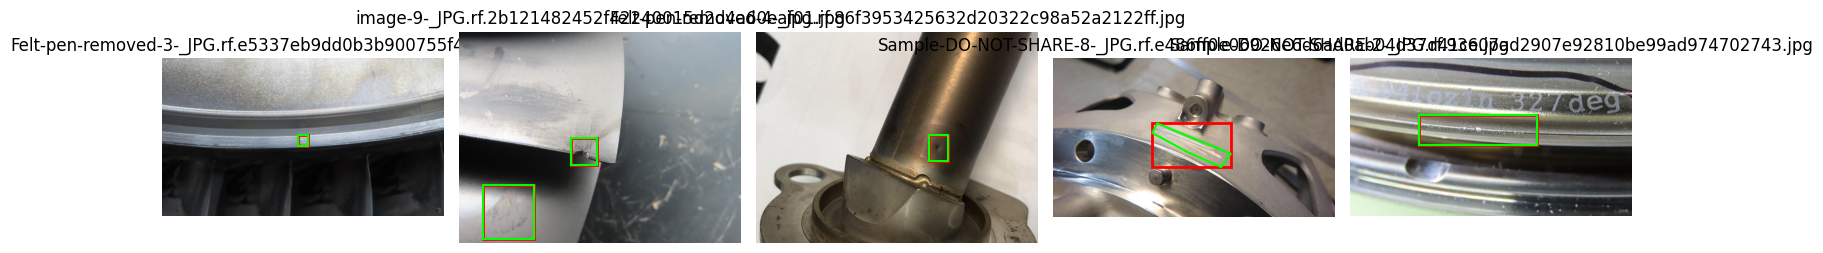

In [ ]:
import os
import random

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pycocotools.coco import COCO

# ─── CONFIG ────────────────────────────────────────────────────────────────────
# Path to your dataset root (must contain an "annotations" folder and image folders)
DATA_DIR = "../data/train"
ANN_FILE = os.path.join(DATA_DIR, "_annotations.coco.json")  # COCO format
IMAGES_DIR = DATA_DIR  # adjust if your images are in a different sub-folder
NUM_SAMPLES = 5  # how many images to visualize
FIGSIZE = (15, 10)  # overall figure size
# ────────────────────────────────────────────────────────────────────────────────

# load COCO annotations
coco = COCO(ANN_FILE)
img_ids = coco.getImgIds()

# sample a few
sample_ids = random.sample(img_ids, k=NUM_SAMPLES)

plt.figure(figsize=FIGSIZE)
for i, img_id in enumerate(sample_ids, 1):
    # load image metadata & annotation ids
    img_meta = coco.loadImgs(img_id)[0]
    ann_ids = coco.getAnnIds(imgIds=[img_id])
    anns = coco.loadAnns(ann_ids)

    # load image
    img_path = os.path.join(IMAGES_DIR, img_meta["file_name"])
    img = Image.open(img_path).convert("RGB")

    # subplot
    ax = plt.subplot(1, NUM_SAMPLES, i)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"{img_meta['file_name']}")

    # draw annotations
    for ann in anns:
        # bounding box (x, y, width, height)
        if "bbox" in ann:
            x, y, w, h = ann["bbox"]
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor="red", facecolor="none")
            ax.add_patch(rect)

        # segmentation (list of polygons)
        seg = ann.get("segmentation", [])
        if isinstance(seg, list):
            for poly in seg:
                poly = np.array(poly).reshape((-1, 2))
                ax.plot(poly[:, 0], poly[:, 1], linewidth=1.5, linestyle="-", color="lime")

plt.tight_layout()
plt.show()


In [4]:
from aircraft_anomaly_detection.dataloader import AnomalyDataset

ad = AnomalyDataset(dataset="lufthansa")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loaded 27 files from lufthansa dataset.


In [5]:
ad[0][2]

Metadata(component='lufthansa', condition='scratched or dented', ground_truth=None, image_path=PosixPath('/Users/shyngys/personal/aircraft-engine-anomaly-detection/data/lufthansa/Sample-DO-NOT-SHARE-7-_JPG.rf.c90dd565e4c546d11785f590d3f17b97.jpg'), description='Lufthansa dataset', split='test', annotation=Annotation(image=None, damaged=True, bboxes=[[1045, 775, 1524.82, 975.9], [3155, 1505, 3660.5299999999997, 1943.93], [1420, 1465, 3378.4570000000003, 2484.433]], scores=[0.0, 0.0, 0.0], bboxes_labels=['scratches-dents', 'scratches-dents', 'scratches-dents'], mask=None))

In [9]:
ad[0][2].annotation

Annotation(image=None, damaged=True, bboxes=[[1045, 775, 1524.82, 975.9], [3155, 1505, 3660.5299999999997, 1943.93], [1420, 1465, 3378.4570000000003, 2484.433]], scores=[0.0, 0.0, 0.0], bboxes_labels=['scratches-dents', 'scratches-dents', 'scratches-dents'], mask=None)

<Axes: >

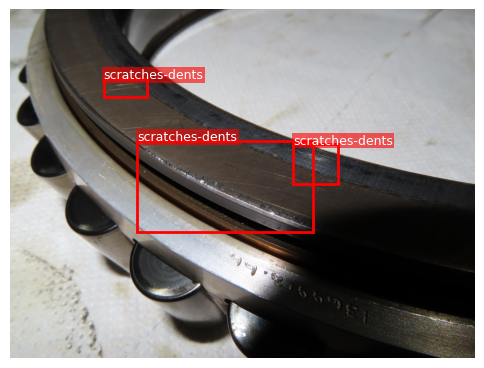

In [ ]:
from aircraft_anomaly_detection.viz_utils import draw_annotation

draw_annotation(ad[0][0], ad[0][2].annotation, cmap=["red"])

In [1]:
from aircraft_anomaly_detection.models.owlvit import OwlViT

texts = ["a clean, undamaged metal surface", "a close-up image of a metal scratch"]

owlvit = OwlViT()
# ann = owlvit.predict(image_input=image_path, text_prompts=texts, undamaged_idxes=[0], top_k=2)


/Users/shyngys/personal/aircraft-engine-anomaly-detection/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
owlvit.model

OwlViTForObjectDetection(
  (owlvit): OwlViTModel(
    (text_model): OwlViTTextTransformer(
      (embeddings): OwlViTTextEmbeddings(
        (token_embedding): Embedding(49408, 512)
        (position_embedding): Embedding(16, 512)
      )
      (encoder): OwlViTEncoder(
        (layers): ModuleList(
          (0-11): 12 x OwlViTEncoderLayer(
            (self_attn): OwlViTAttention(
              (k_proj): Linear(in_features=512, out_features=512, bias=True)
              (v_proj): Linear(in_features=512, out_features=512, bias=True)
              (q_proj): Linear(in_features=512, out_features=512, bias=True)
              (out_proj): Linear(in_features=512, out_features=512, bias=True)
            )
            (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
            (mlp): OwlViTMLP(
              (activation_fn): QuickGELUActivation()
              (fc1): Linear(in_features=512, out_features=2048, bias=True)
              (fc2): Linear(in_features=2048, out_